The goal of this notebook is just to plot some visualizations for easy
inspection and presentation of how the pose estimations look.

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import os

pose_dir = '../data/poses/'

poses = []
lexemes = []

for root, dirs, files in os.walk(pose_dir):
    for file in files:
        if file.endswith('.npy'):
            filepath = os.path.join(root, file)
            poses.append(filepath)

            label = os.path.basename(root)
            lexemes.append(label)

poses = np.array(poses, dtype = object)
lexemes = np.array(lexemes, dtype = object)

index = np.random.choice(len(poses), size = 10, replace = False)
pose_list = poses[index]
lexeme_list = lexemes[index]

print('Lexeme List:', lexeme_list)
print(pose_list)

Lexeme List: ['AUCH' 'AUCH' 'ICH' 'WISSEN' 'FERTIG' 'ICH' 'TAUB' 'WIE' 'TAUB' 'NICHT']
['../data/poses/AUCH\\1211082-13131933-13230433_1a1_153.780_AUCH.npy'
 '../data/poses/AUCH\\1180097_1b1_408.100_AUCH.npy'
 '../data/poses/ICH\\1292458_1b1_32.620_ICH.npy'
 '../data/poses/WISSEN\\1180097_1b1_494.540_WISSEN.npy'
 '../data/poses/FERTIG\\1290126_1b1_499.420_FERTIG.npy'
 '../data/poses/ICH\\1290126_1b1_896.860_ICH.npy'
 '../data/poses/TAUB\\1290126_1b1_1.060_TAUB.npy'
 '../data/poses/WIE\\1414312_1b1_169.880_WIE.npy'
 '../data/poses/TAUB\\1419797_1b1_442.240_TAUB.npy'
 '../data/poses/NICHT\\1292458_1a1_678.620_NICHT.npy']


In [66]:
def draw_hand_skeleton(offset, hand_skeleton, x_coords, y_coords, axes):
    for start, end in hand_skeleton:
        s_idx = start + offset
        e_idx = end + offset
        axes.plot([x_coords[s_idx], x_coords[e_idx]], [y_coords[s_idx], y_coords[e_idx]], 'r-', linewidth = 2)

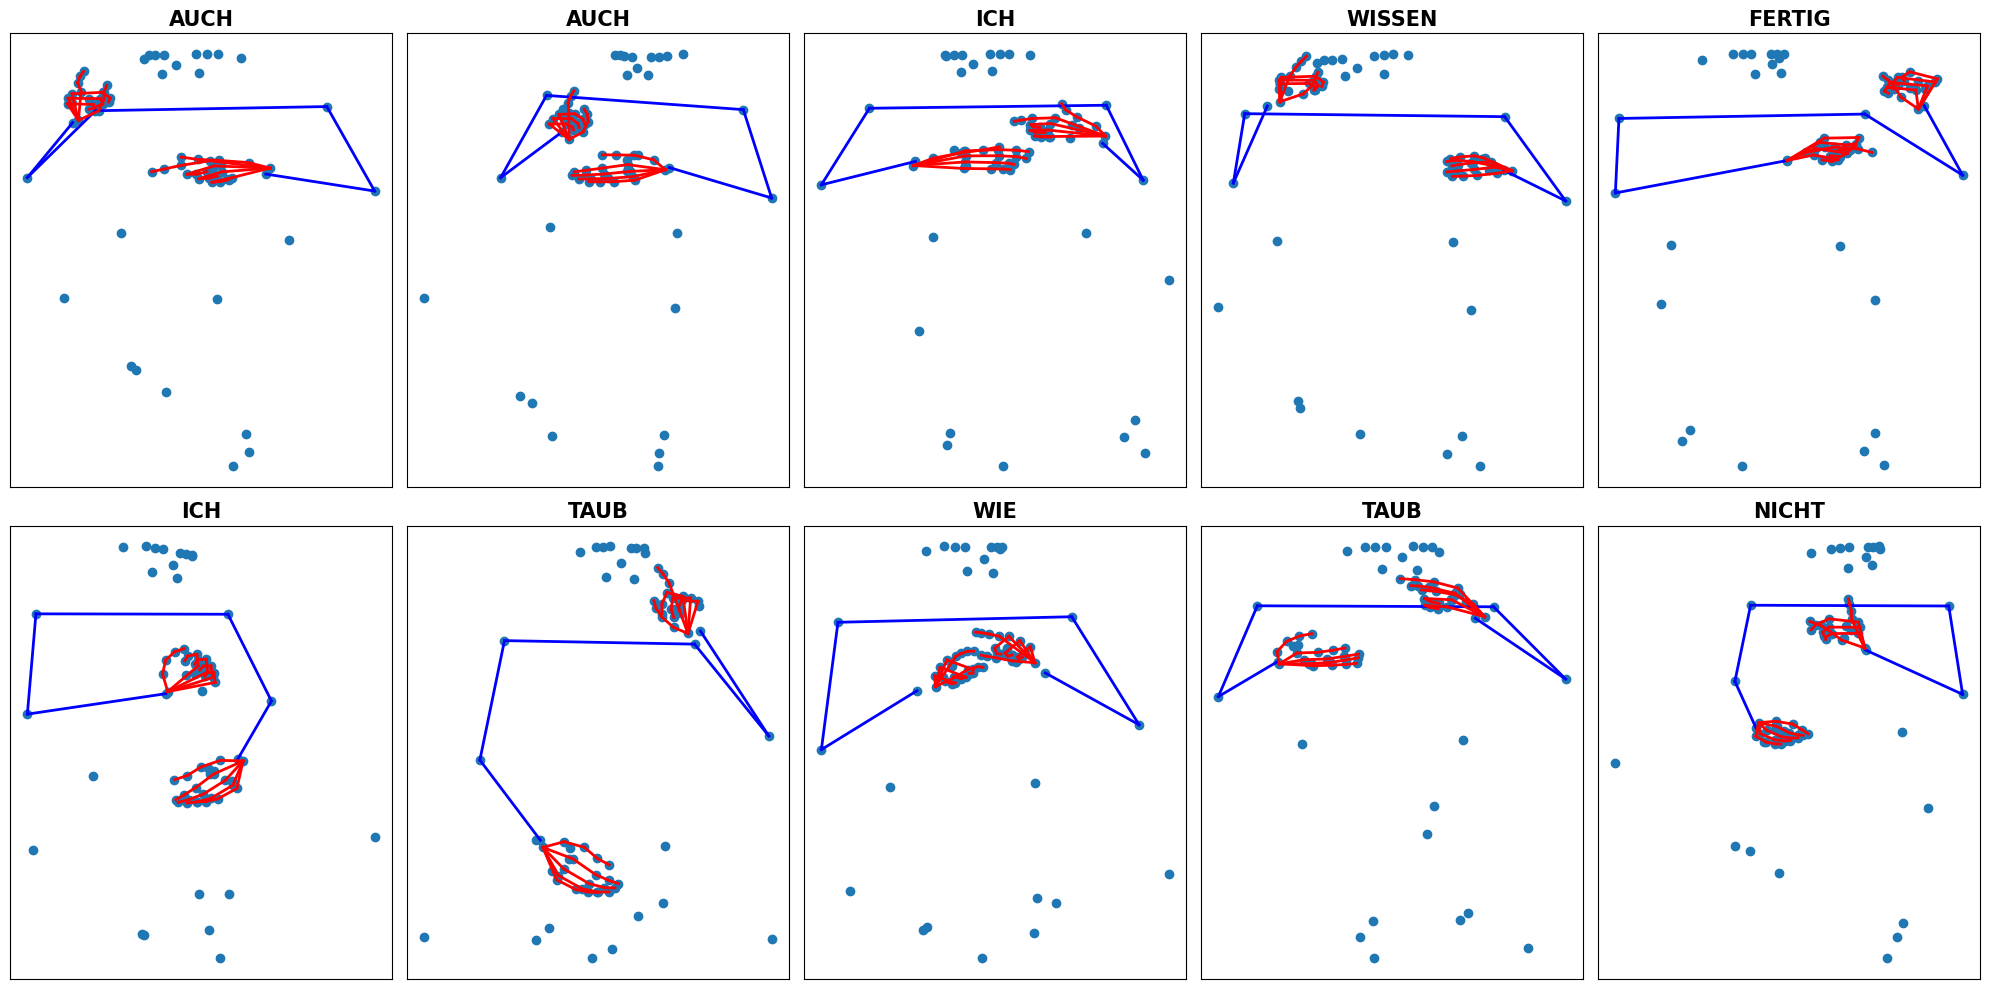

In [91]:
hand_skeleton = [
    (0,1),(1,2),(2,3),(3,4),
    (0,5),(5,6),(6,7),(7,8),
    (0,9),(9,10),(10,11),(11,12),
    (0,13),(13,14),(14,15),(15,16),
    (0,17),(17,18),(18,19),(19,20)]

left_hand_offset = 33
right_hand_offset = 54

body_skeleton = [
    (11, 13), (13, 15),
    (12, 14), (14, 16),
    (11, 12),
]

fig, ax = plt.subplots(2, 5, figsize = (20, 10))

for index, axes in enumerate(ax.flat):

    pose = np.load(pose_list[index])
    lex = lexeme_list[index]

    frame_index = pose.shape[0]//2
    single_frame = pose[frame_index, :, :]

    x_coords = single_frame[:, 0]
    y_coords = single_frame[:, 1]

    x_norm = (x_coords - x_coords.min()) / (x_coords.max() - x_coords.min())
    y_norm = (y_coords - y_coords.min()) / (y_coords.max() - y_coords.min())

    axes.scatter(x_norm, y_norm)
    axes.set_title(lex, fontweight = 'bold', fontsize = 15)
    axes.invert_yaxis()
    axes.invert_xaxis()
    axes.set_xticks([])
    axes.set_yticks([])


    for start, end in body_skeleton:
        axes.plot([x_norm[start], x_norm[end]], [y_norm[start], y_norm[end]], 'b-', linewidth = 2)

    draw_hand_skeleton(left_hand_offset, hand_skeleton, x_norm, y_norm, axes)
    draw_hand_skeleton(right_hand_offset, hand_skeleton, x_norm, y_norm, axes)

plt.tight_layout()
os.makedirs('../images', exist_ok = True)
plt.savefig('../images/example_skeletons.png')
